# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset:

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [1]:
#https://www.kaggle.com/danielfesalbon/covid-19-global-reports-early-march-2022


In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')

In [5]:
df = pd.read_csv("covid_19_clean_complete_2022.csv") 

In [6]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [8]:
df.info() #seeing how big the dataset is.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214894 entries, 0 to 214893
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Province/State  65705 non-null   object 
 1   Country/Region  214894 non-null  object 
 2   Lat             213348 non-null  float64
 3   Long            213348 non-null  float64
 4   Date            214894 non-null  object 
 5   Confirmed       214894 non-null  int64  
 6   Deaths          214894 non-null  int64  
 7   Recovered       214894 non-null  int64  
 8   Active          214894 non-null  int64  
 9   WHO Region      212575 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 16.4+ MB


In [9]:
df.isnull( ).sum( ) #looking to see how many nulls there are. 

Province/State    149189
Country/Region         0
Lat                 1546
Long                1546
Date                   0
Confirmed              0
Deaths                 0
Recovered              0
Active                 0
WHO Region          2319
dtype: int64

In [21]:
df.drop(['Lat', 'Long',], axis=1) #dropping because I don't feel it is necessarry.  

,Province/State,Country/Region,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...
214889,NaN,West Bank and Gaza,2022-03-04,649971,5557,0,644414,Eastern Mediterranean
214890,NaN,Winter Olympics 2022,2022-03-04,530,0,0,530,NaN
214891,NaN,Yemen,2022-03-04,11774,2135,0,9639,Eastern Mediterranean
214892,NaN,Zambia,2022-03-04,313613,3958,0,309655,Africa


In [14]:
df.duplicated( )

0         False
1         False
2         False
3         False
4         False
          ...  
214889    False
214890    False
214891    False
214892    False
214893    False
Length: 214894, dtype: bool

In [22]:
df['Deaths'].value_counts( )

0         43208
1          8567
2          6361
3          6180
6          4178
          ...  
54417         1
11766         1
109011        1
28282         1
5557          1
Name: Deaths, Length: 28317, dtype: int64

In [23]:
df['Active'].value_counts( )

0         29592
1          4613
2          2908
3          2417
4          1799
          ...  
40365         1
10630         1
4658          1
260945        1
233342        1
Name: Active, Length: 65432, dtype: int64

In [28]:
df.corr( )

,Lat,Long,Confirmed,Deaths,Recovered,Active
Lat,1.000000,-0.076193,0.045692,0.023828,-0.007068,0.051112
Long,-0.076193,1.000000,-0.060558,-0.097403,-0.009475,-0.060158
Confirmed,0.045692,-0.060558,1.000000,0.922620,0.330394,0.947829
Deaths,0.023828,-0.097403,0.922620,1.000000,0.354855,0.854839
Recovered,-0.007068,-0.009475,0.330394,0.354855,1.000000,0.012357
Active,0.051112,-0.060158,0.947829,0.854839,0.012357,1.000000


## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

C:\Users\tgray\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Deaths', ylabel='Density'>

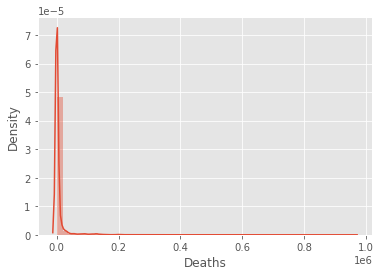

In [27]:
sns.distplot(df.Deaths.dropna())

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? There are a lot of nulls.
2. Do you have any concerns about your dataset? With all the nulls I am concerned about the accuracy of the reporting for these figures. 
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? 